In [59]:
# Importar las librerías necesarias para el análisis de datos y visualización
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from scipy import stats # Importar la librería stats para pruebas estadísticas
from statsmodels.nonparametric.smoothers_lowess import lowess


# Parte 4

Además de los datos que recuperaste en las tareas anteriores te han dado un segundo archivo. Ahora tienes estos dos CSV:

/datasets/project_sql_result_01.csv. contiene los siguientes datos:

`company_name`: nombre de la empresa de taxis

`trips_amount`: el número de viajes de cada compañía de taxis el 15 y 16 de noviembre de 2017.

/datasets/project_sql_result_04.csv. contiene los siguientes datos:

`dropoff_location_name`: barrios de Chicago donde finalizaron los viajes

`average_trips`: el promedio de viajes que terminaron en cada barrio en noviembre de 2017.

---
Para estos dos datasets ahora necesitas

- importar los archivos
- estudiar los datos que contienen
- asegurarte de que los tipos de datos sean correctos
- identificar los 10 principales barrios en términos de finalización del recorrido
- hacer gráficos: empresas de taxis y número de viajes, los 10 barrios principales por número de finalizaciones
- sacar conclusiones basadas en cada gráfico y explicar los resultados

In [2]:
sql_result_01 = "https://raw.githubusercontent.com/Davichobacter/data_science_tt/refs/heads/main/Sprint_8/project_sql_result_01.csv"
sql_result_04 = "https://raw.githubusercontent.com/Davichobacter/data_science_tt/refs/heads/main/Sprint_8/project_sql_result_04.csv"

# Cargar el dataset
Cargar los archivos CSV `project_sql_result_01.csv` y `project_sql_result_04.csv` en DataFrames de pandas, explorar sus estructuras, tipos de datos y estadísticas descriptivas. Luego, identificar las 10 principales compañías de taxis por número de viajes y los 10 principales barrios de destino por promedio de viajes, visualizando estos resultados con gráficos de barras y extrayendo conclusiones de cada uno, y finalmente resumir los hallazgos clave.

Cargue el archivo CSV desde `sql_result_01` en un DataFrame de pandas llamado `df_trips_companies` y mostre sus primeras 5 filas para verificar que los datos se hayan cargado correctamente.

In [3]:
df_trips_companies = pd.read_csv(sql_result_01)
df_trips_companies.head()

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasin,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299


Cargue el archivo CSV desde la URL `sql_result_04` en un DataFrame de pandas denominado `df_trips_locations` y mostre sus primeras 5 filas para verificar que los datos se hayan cargado correctamente.



In [4]:
df_trips_locations = pd.read_csv(sql_result_04)
df_trips_locations.head()

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000


## Explorar Datos Iniciales

Mostrar las primeras filas de ambos DataFrames (`.head()`), verificar sus tipos de datos (`.info()`) y obtener un resumen estadístico descriptivo (`.describe()`) para entender la estructura y el contenido de los datos.


Se requiere mostrar los tipos de datos y las estadísticas descriptivas de ambos marcos de datos. Comenzaré con `df_trips_companies` utilizando `.info()` para comprobar los tipos de datos y `.describe()` para obtener un resumen estadístico.


In [5]:
print("Información de df_trips_companies:")
df_trips_companies.info()
print("\nEstadísticas descriptivas de df_trips_companies:")
df_trips_companies.describe()

Información de df_trips_companies:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB

Estadísticas descriptivas de df_trips_companies:


,trips_amount
count,64.000000
mean,2145.484375
std,3812.310186
min,2.000000
25%,20.750000
50%,178.500000
75%,2106.500000
max,19558.000000


Ahora mostraré los tipos de datos y las estadísticas descriptivas del DataFrame `df_trips_locations` utilizando `.info()` y `.describe()`.



In [6]:
print("Información de df_trips_locations:")
df_trips_locations.info()
print("\nEstadísticas descriptivas de df_trips_locations:")
df_trips_locations.describe()

Información de df_trips_locations:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB

Estadísticas descriptivas de df_trips_locations:


,average_trips
count,94.000000
mean,599.953728
std,1714.591098
min,1.800000
25%,14.266667
50%,52.016667
75%,298.858333
max,10727.466667


## Verificar y Corregir Tipos de Datos

Inspeccionar los tipos de datos de cada columna y realizar las conversiones necesarias si hay alguna columna con un tipo de dato incorrecto que pueda afectar el análisis.


### Tipos de Datos Verificados

Después de revisar los tipos de datos de ambos DataFrames con `.info()`:

- **`df_trips_companies`**:
  - `company_name`: `object` (cadena de texto), es correcto.
  - `trips_amount`: `int64` (número entero), es correcto para representar la cantidad de viajes.

- **`df_trips_locations`**:
  - `dropoff_location_name`: `object` (cadena de texto), es correcto.
  - `average_trips`: `float64` (número decimal), es correcto para representar el promedio de viajes.

No se encontraron tipos de datos incorrectos que requieran conversión. Los tipos de datos actuales son apropiados para el análisis posterior.

# Identificar las 10 Principales Compañías de Taxis

Identificar las 10 principales compañías de taxis en términos de `trips_amount` del dataset `project_sql_result_01.csv`.


Para identificar las 10 principales compañías de taxis, necesito ordenar el DataFrame `df_trips_companies` por 'trips_amount' en orden descendente y luego seleccionar las primeras 10 entradas.



In [7]:
top_10_companies = df_trips_companies.sort_values(by='trips_amount', ascending=False).head(10)
print("Las 10 principales compañías de taxis por número de viajes:")
print(top_10_companies)

Las 10 principales compañías de taxis por número de viajes:
                        company_name  trips_amount
0                          Flash Cab         19558
1          Taxi Affiliation Services         11422
2                   Medallion Leasin         10367
3                         Yellow Cab          9888
4    Taxi Affiliation Service Yellow          9299
5          Chicago Carriage Cab Corp          9181
6                       City Service          8448
7                           Sun Taxi          7701
8          Star North Management LLC          7455
9  Blue Ribbon Taxi Association Inc.          5953


## Visualizar Empresas de Taxis y Número de Viajes

Crear un gráfico de barras para visualizar las 10 principales compañías de taxis y el número de viajes que realizaron, incluyendo leyendas y etiquetas claras. Proporcionar conclusiones basadas en este gráfico.


Se requiere visualizar las 10 principales empresas de taxis por número de viajes. Utilizaré `seaborn.barplot` para crear un gráfico de barras a partir del DataFrame `top_10_companies`, asegurándome de que las etiquetas, el título y la rotación del eje x sean adecuados para facilitar la lectura.



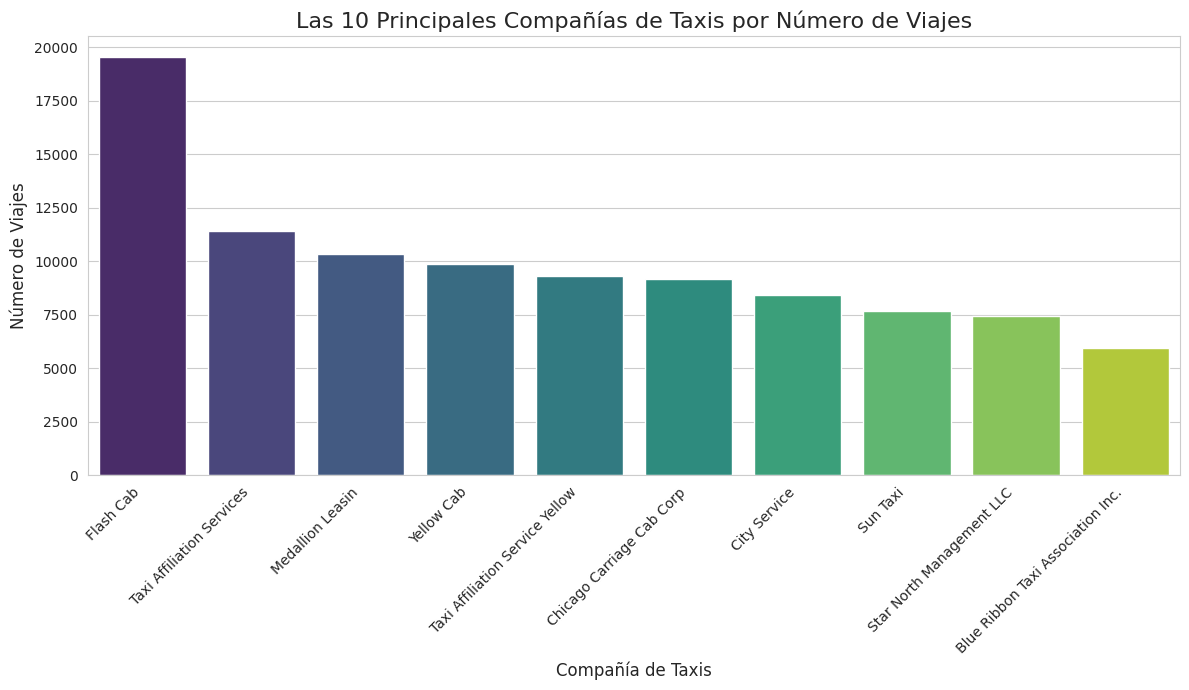

In [13]:
sns.set_style("whitegrid")
plt.figure(figsize=(12, 7))
sns.barplot(x='company_name', y='trips_amount', data=top_10_companies, palette='viridis', hue='company_name')
plt.title('Las 10 Principales Compañías de Taxis por Número de Viajes', fontsize=16)
plt.xlabel('Compañía de Taxis', fontsize=12)
plt.ylabel('Número de Viajes', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10) # Rotate x-axis labels for better readability
plt.yticks(fontsize=10)
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

### Conclusión del Gráfico de las 10 Principales Compañías de Taxis

El gráfico muestra la distribución de viajes entre las 10 compañías de taxis más activas. Se pueden ver estas conclusiones:

1.  **Flash Cab** es la empresa de taxis que más viaja, muchísimo más que las demás. Esto muestra que tienen una gran presencia en el mercado y probablemente más clientes o una mejor forma de conseguirlos.
2.  Las cinco primeras empresas (Flash Cab, Taxi Affiliation Services, Medallion Leasing, Yellow Cab y Taxi Affiliation Service Yellow) concentran la mayoría de los viajes, lo que indica una alta concentración del mercado.
3.  El mercado es oligopólico, con pocos actores dominando la mayoría de los viajes y un grupo más grande de compañías más pequeñas compitiendo por el resto.

El mercado de taxis lo lideran unas pocas grandes compañías, siendo Flash Cab la más destacada. Cualquier análisis o estrategia futura debería considerar su fuerte influencia.

# Identificar los 10 Principales Barrios de Destino

Identificar los 10 principales barrios (`dropoff_location_name`) con el mayor `average_trips` del dataset `project_sql_result_04.csv`.


Para identificar las 10 ubicaciones con mayor número de bajadas, necesito ordenar el DataFrame `df_trips_locations` por `average_trips` en orden descendente y, a continuación, seleccionar las primeras 10 entradas.


In [10]:
top_10_locations = df_trips_locations.sort_values(by='average_trips', ascending=False).head(10)
print("Las 10 principales ubicaciones de destino por promedio de viajes:")
print(top_10_locations)

Las 10 principales ubicaciones de destino por promedio de viajes:
  dropoff_location_name  average_trips
0                  Loop   10727.466667
1           River North    9523.666667
2         Streeterville    6664.666667
3             West Loop    5163.666667
4                O'Hare    2546.900000
5             Lake View    2420.966667
6            Grant Park    2068.533333
7         Museum Campus    1510.000000
8            Gold Coast    1364.233333
9    Sheffield & DePaul    1259.766667


## Visualizar los 10 Principales Barrios de Destino

Crear un gráfico de barras para visualizar los 10 principales barrios de destino y su promedio de viajes, incluyendo leyendas y etiquetas claras. Proporcionar conclusiones basadas en este gráfico.

La subtarea requiere visualizar las 10 ubicaciones principales de entrega por promedio de viajes. Utilizaré `seaborn.barplot` para crear un gráfico de barras a partir del DataFrame `top_10_locations`, asegurándome de que las etiquetas, el título y la rotación del eje x sean adecuados para facilitar la lectura, de forma similar a la visualización anterior.


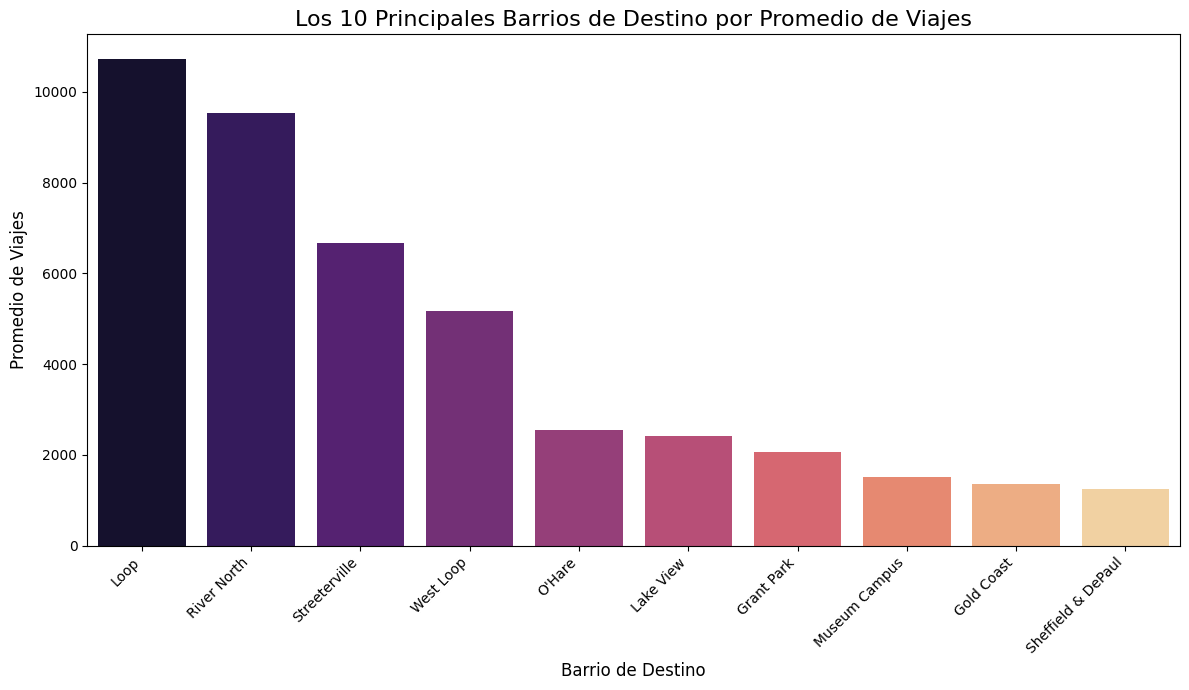

In [11]:
plt.figure(figsize=(12, 7))
sns.barplot(x='dropoff_location_name', y='average_trips', data=top_10_locations, palette='magma', hue='dropoff_location_name', legend=False)
plt.title('Los 10 Principales Barrios de Destino por Promedio de Viajes', fontsize=16)
plt.xlabel('Barrio de Destino', fontsize=12)
plt.ylabel('Promedio de Viajes', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10) # Rotate x-axis labels for better readability
plt.yticks(fontsize=10)
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

### Conclusión del Gráfico de los 10 Principales Barrios de Destino

El gráfico muestra los 10 barrios de destino con más viajes de taxi. Estas son las conclusiones principales:

1.  Los barrios del Loop y River North son los que tienen más viajes. Estas áreas son centros de negocios, distritos financieros, centros comerciales y destinos turísticos importantes en Chicago, lo que explica la alta demanda de transporte.
2.  Los barrios de Streeterville, Grant Park y Museum Campus son también destinos turísticos y recreativos. Hay hoteles de lujo, atracciones, museos y parques populares. Hay un flujo constante de visitantes que usan taxis.
3.  Los centros de transporte son importantes porque el aeropuerto de O'Hare (Aeropuerto Internacional O'Hare) es significativo. Es un aeropuerto importante para los residentes, turistas y viajeros de negocios porque es un punto de origen y destino para viajes en taxi.
4.  Hay una gran diferencia en el número de viajes entre los barrios principales. El Loop y River North tienen más de 9000 viajes, pero barrios como Gold Coast y Sheffield & DePaul tienen menos de 1300. Esto muestra que la demanda está concentrada en unas pocas zonas.
5.  Los datos muestran que los viajes en taxi dependen mucho de la economía, el turismo y el ocio. Los sitios con más taxis son los que tienen más oficinas, tiendas y atracciones.

# Resumen de las conclusiones

Resumir las conclusiones clave de los análisis y gráficos realizados para ambos datasets.


### Análisis de datos: conclusiones principales

*   **Carga y estructura de los datos**: Se cargaron correctamente dos conjuntos de datos: `df_trips_companies` (64 entradas, 2 columnas) y `df_trips_locations` (94 entradas, 2 columnas). No se encontraron valores faltantes y todos los tipos de datos eran adecuados para el análisis.
*   **Distribución muy sesgada de los viajes**: Ambos conjuntos de datos mostraron distribuciones muy sesgadas:
    *   En el caso de las empresas de taxis, el `trips_amount` tenía una media de aproximadamente 2145,48, pero una mediana de solo 178,50, lo que indica que unas pocas empresas gestionan un número desproporcionadamente alto de viajes.
    *   En cuanto a los lugares de destino, `average_trips` mostró una media de 599,95 y una mediana de 52,02, lo que sugiere que un pequeño número de lugares atraen un número medio significativamente mayor de viajes en taxi.
*   **Dominio en el mercado de las empresas de taxis**:
    * **Flash Cab** es la empresa de taxis líder, superando significativamente a todas las demás en términos de **trips_amount**.
    * Las cinco principales empresas ("Flash Cab" , "Taxi Affiliation Services", "Medallion Leasing", "Yellow Cab" y "Taxi Affiliation Service Yellow") concentran una gran parte del total de viajes, lo que indica una estructura de mercado muy concentrada, posiblemente oligopolística.
*   **Puntos clave de entrega de llaves**:
    * "Loop" (con un promedio de 10 727,47 viajes) y "River North" (con un promedio de 9523,67 viajes) son los principales destinos de los viajes en taxi, lo que destaca su importancia como centros urbanos y de negocios.
    * Otros destinos importantes son las zonas turísticas y recreativas como «Streeterville» (6664,67 viajes de media) y «Grant Park» (2068,57 viajes de media), así como los principales centros de transporte, como «O'Hare» (2546,67 viajes de media).
    * La demanda de servicios de taxi se concentra en gran medida en estas pocas áreas clave, impulsada en gran parte por actividades económicas, turísticas y de ocio.


# Parte 5
/datasets/project_sql_result_07.csv — el resultado de la última consulta. Contiene datos sobre viajes desde el Loop hasta el Aeropuerto Internacional O'Hare. Recuerda, estos son los valores de campo de la tabla:

`start_ts`: fecha y hora de la recogida

`weather_conditions`: condiciones climáticas en el momento en el que comenzó el viaje

`duration_seconds`: duración del viaje en segundos

---
Prueba la hipótesis:

> "La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos".

Decide por tu cuenta dónde establecer el nivel de significación (alfa).

Explica:

* cómo planteaste las hipótesis nula y alternativa
* qué criterio usaste para probar las hipótesis y por qué

In [20]:
sql_result_07 = 'https://raw.githubusercontent.com/Davichobacter/data_science_tt/refs/heads/main/Sprint_8/project_sql_result_07.csv'

# Cargar y explorar el dataset


Cargar el archivo `project_sql_result_07.csv` en un DataFrame de pandas y mostrar sus primeras filas, la información general (`.info()`) y estadísticas descriptivas (`.describe()`) para entender su estructura y contenido.


In [21]:
df_trips_loop_ohare = pd.read_csv(sql_result_07)
print("Primeras 5 filas de df_trips_loop_ohare:")
print(df_trips_loop_ohare.head())

print("\nInformación de df_trips_loop_ohare:")
df_trips_loop_ohare.info()

print("\nEstadísticas descriptivas de df_trips_loop_ohare:")
print(df_trips_loop_ohare.describe())

Primeras 5 filas de df_trips_loop_ohare:
              start_ts weather_conditions  duration_seconds
0  2017-11-25 16:00:00               Good            2410.0
1  2017-11-25 14:00:00               Good            1920.0
2  2017-11-25 12:00:00               Good            1543.0
3  2017-11-04 10:00:00               Good            2512.0
4  2017-11-11 07:00:00               Good            1440.0

Información de df_trips_loop_ohare:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB

Estadísticas descriptivas de df_trips_loop_ohare:
       duration_seconds
count       1068.000000
mean        2071.731273
std          769.461125
min        

## Verificar y corregir tipos de datos

Inspeccionar los tipos de datos de las columnas. Convertir la columna `start_ts` a tipo datetime para facilitar la extracción de información temporal.


In [22]:
df_trips_loop_ohare['start_ts'] = pd.to_datetime(df_trips_loop_ohare['start_ts'])
print("Tipos de datos después de la conversión de 'start_ts':")
df_trips_loop_ohare.info()

Tipos de datos después de la conversión de 'start_ts':
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            1068 non-null   datetime64[ns]
 1   weather_conditions  1068 non-null   object        
 2   duration_seconds    1068 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 25.2+ KB


## Extraer información de la fecha y hora

Extraer el día de la semana de la columna `start_ts` y crear una nueva columna para ello. Esto es crucial para identificar los sábados.


In [23]:
df_trips_loop_ohare['day_of_week'] = df_trips_loop_ohare['start_ts'].dt.day_name()
print("Primeras 5 filas de df_trips_loop_ohare con la nueva columna 'day_of_week':")
print(df_trips_loop_ohare.head())

Primeras 5 filas de df_trips_loop_ohare con la nueva columna 'day_of_week':
             start_ts weather_conditions  duration_seconds day_of_week
0 2017-11-25 16:00:00               Good            2410.0    Saturday
1 2017-11-25 14:00:00               Good            1920.0    Saturday
2 2017-11-25 12:00:00               Good            1543.0    Saturday
3 2017-11-04 10:00:00               Good            2512.0    Saturday
4 2017-11-11 07:00:00               Good            1440.0    Saturday


In [24]:
saturday_good_weather = df_trips_loop_ohare[(df_trips_loop_ohare['day_of_week'] == 'Saturday') & (df_trips_loop_ohare['weather_conditions'] == 'Good')]
saturday_rainy_weather = df_trips_loop_ohare[(df_trips_loop_ohare['day_of_week'] == 'Saturday') & (df_trips_loop_ohare['weather_conditions'] == 'Rainy')]

print("Número de viajes en sábados con buen clima:", len(saturday_good_weather))
print("Número de viajes en sábados con clima lluvioso:", len(saturday_rainy_weather))

print("\nPrimeras 5 filas de viajes en sábados con buen clima:")
print(saturday_good_weather.head())

print("\nPrimeras 5 filas de viajes en sábados con clima lluvioso:")
print(saturday_rainy_weather.head())

Número de viajes en sábados con buen clima: 888
Número de viajes en sábados con clima lluvioso: 0

Primeras 5 filas de viajes en sábados con buen clima:
             start_ts weather_conditions  duration_seconds day_of_week
0 2017-11-25 16:00:00               Good            2410.0    Saturday
1 2017-11-25 14:00:00               Good            1920.0    Saturday
2 2017-11-25 12:00:00               Good            1543.0    Saturday
3 2017-11-04 10:00:00               Good            2512.0    Saturday
4 2017-11-11 07:00:00               Good            1440.0    Saturday

Primeras 5 filas de viajes en sábados con clima lluvioso:
Empty DataFrame
Columns: [start_ts, weather_conditions, duration_seconds, day_of_week]
Index: []


# Analizar condiciones climáticas y duración

Explorar la distribución de `weather_conditions` y `duration_seconds`. Identificar qué se considera 'lluvioso' y cómo se distribuye la duración de los viajes.


In [25]:
print("Valores únicos en 'weather_conditions':")
print(df_trips_loop_ohare['weather_conditions'].unique())

Valores únicos en 'weather_conditions':
['Good' 'Bad']


In [26]:
print("Estadísticas descriptivas de 'duration_seconds' por 'weather_conditions':\n")
print(df_trips_loop_ohare.groupby('weather_conditions')['duration_seconds'].describe())

Estadísticas descriptivas de 'duration_seconds' por 'weather_conditions':

                    count         mean         std    min      25%     50%  \
weather_conditions                                                           
Bad                 180.0  2427.205556  721.314138  480.0  1962.00  2540.0   
Good                888.0  1999.675676  759.198268    0.0  1389.75  1800.0   

                       75%     max  
weather_conditions                  
Bad                 2928.0  4980.0  
Good                2460.0  7440.0  


In [27]:
print("Valores únicos de 'weather_conditions' para los viajes de sábado:")
print(df_trips_loop_ohare[df_trips_loop_ohare['day_of_week'] == 'Saturday']['weather_conditions'].unique())

Valores únicos de 'weather_conditions' para los viajes de sábado:
['Good' 'Bad']


# Hipótesis

Formulare la hipótesis utilizando las condiciones 'Bad' como sustituto de condiciones climáticas desfavorables.

**Hipótesis nula (H0):** La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare **no cambia** significativamente en sábados con condiciones climáticas 'Bad' en comparación con sábados con condiciones climáticas 'Good'.

$\qquad H_0: \mu_{Bad} = \mu_{Good}$

**Hipótesis alternativa (H1):** La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare **cambia** significativamente (es diferente) en sábados con condiciones climáticas 'Bad' en comparación con sábados con condiciones climáticas 'Good'.

$\qquad H_1: \mu_{Bad} \ne \mu_{Good}$

Donde:
- $\mu_{Bad}$ es la duración promedio de los viajes en sábados con condiciones 'Bad'.
- $\mu_{Good}$ es la duración promedio de los viajes en sábados con condiciones 'Good'.

Estableceremos un **nivel de significación (alfa) de 0.05** para esta prueba. Si el p-valor resultante de la prueba estadística es menor que 0.05, rechazaremos la hipótesis nula.

In [28]:
saturday_good_weather_duration = df_trips_loop_ohare[(df_trips_loop_ohare['day_of_week'] == 'Saturday') & (df_trips_loop_ohare['weather_conditions'] == 'Good')]['duration_seconds']
saturday_bad_weather_duration = df_trips_loop_ohare[(df_trips_loop_ohare['day_of_week'] == 'Saturday') & (df_trips_loop_ohare['weather_conditions'] == 'Bad')]['duration_seconds']

print("Duración de viajes en sábados con buen clima (primeras 5):\n", saturday_good_weather_duration.head())
print("\nDuración de viajes en sábados con clima malo (primeras 5):\n", saturday_bad_weather_duration.head())

Duración de viajes en sábados con buen clima (primeras 5):
 0    2410.0
1    1920.0
2    1543.0
3    2512.0
4    1440.0
Name: duration_seconds, dtype: float64

Duración de viajes en sábados con clima malo (primeras 5):
 6     2969.0
30    1980.0
34    2460.0
51    2760.0
52    2460.0
Name: duration_seconds, dtype: float64


In [29]:
alpha = 0.05

# Realizar la prueba t de Student para muestras independientes
# Se usa equal_var=False porque no se asume que las varianzas sean iguales
t_statistic, p_value = stats.ttest_ind(saturday_bad_weather_duration, saturday_good_weather_duration, equal_var=False)

print(f"T-statistic: {t_statistic:.2f}")
print(f"P-value: {p_value:.3e}")

if p_value < alpha:
    print(f"\nDado que el p-valor ({p_value:.3e}) es menor que el nivel de significación ({alpha}), rechazamos la hipótesis nula.")
    print("Conclusión: La duración promedio de los viajes en sábados con clima 'Bad' es significativamente diferente de la duración promedio en sábados con clima 'Good'.")
elif p_value >= alpha:
    print(f"\nDado que el p-valor ({p_value:.3e}) es mayor o igual que el nivel de significación ({alpha}), no podemos rechazar la hipótesis nula.")
    print("Conclusión: No hay evidencia suficiente para afirmar que la duración promedio de los viajes en sábados con clima 'Bad' es significativamente diferente de la duración promedio en sábados con clima 'Good'.")

# Mostrar las medias para contextualizar
print(f"\nDuración promedio en sábados con clima 'Good': {saturday_good_weather_duration.mean():.2f} segundos")
print(f"Duración promedio en sábados con clima 'Bad': {saturday_bad_weather_duration.mean():.2f} segundos")

T-statistic: 7.19
P-value: 6.739e-12

Dado que el p-valor (6.739e-12) es menor que el nivel de significación (0.05), rechazamos la hipótesis nula.
Conclusión: La duración promedio de los viajes en sábados con clima 'Bad' es significativamente diferente de la duración promedio en sábados con clima 'Good'.

Duración promedio en sábados con clima 'Good': 1999.68 segundos
Duración promedio en sábados con clima 'Bad': 2427.21 segundos


## Visualizar la duración de viajes por condiciones climáticas y día de la semana

Crear gráficos para visualizar la distribución de `duration_seconds` en diferentes `weather_conditions`, especialmente enfocándose en los sábados, para obtener una primera impresión de las diferencias antes de la prueba de hipótesis.


/tmp/ipython-input-930435790.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='weather_conditions', y='duration_seconds', data=df_trips_loop_ohare[df_trips_loop_ohare['day_of_week'] == 'Saturday'], palette={'Good': 'skyblue', 'Bad': 'lightcoral'})


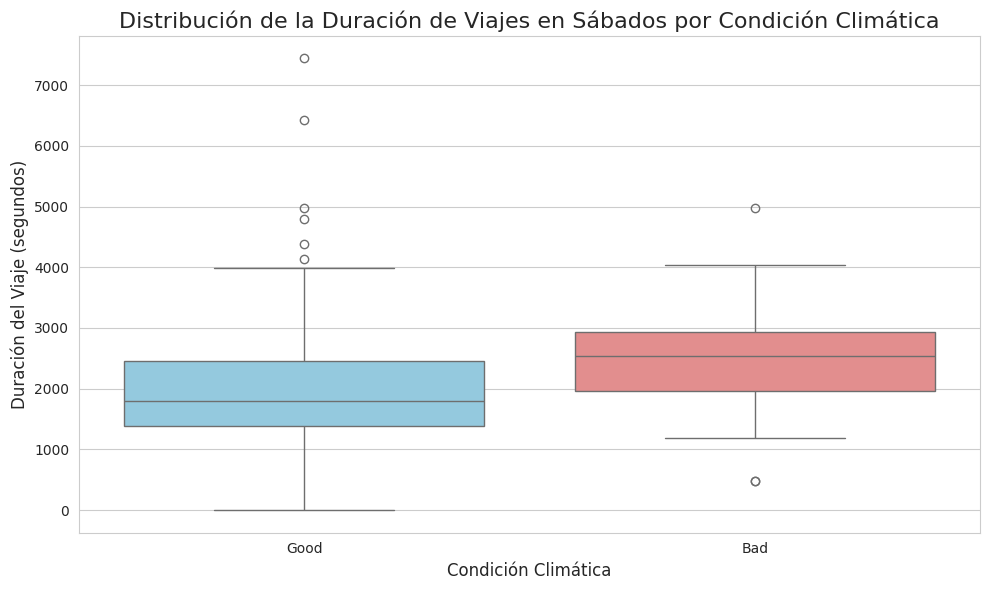

In [30]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='weather_conditions', y='duration_seconds', data=df_trips_loop_ohare[df_trips_loop_ohare['day_of_week'] == 'Saturday'], palette={'Good': 'skyblue', 'Bad': 'lightcoral'})
plt.title('Distribución de la Duración de Viajes en Sábados por Condición Climática', fontsize=16)
plt.xlabel('Condición Climática', fontsize=12)
plt.ylabel('Duración del Viaje (segundos)', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

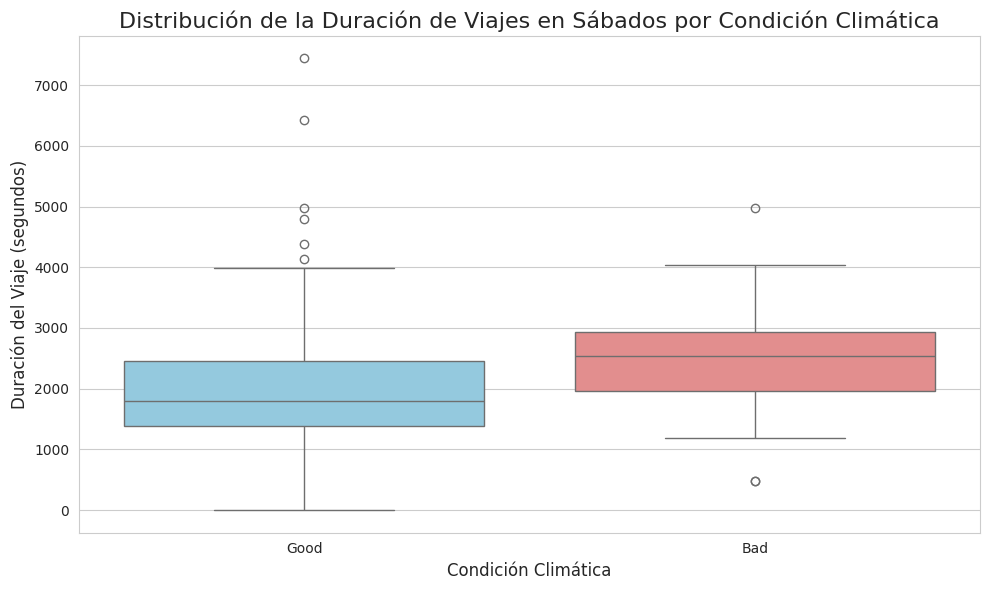

In [31]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='weather_conditions', y='duration_seconds', data=df_trips_loop_ohare[df_trips_loop_ohare['day_of_week'] == 'Saturday'], palette={'Good': 'skyblue', 'Bad': 'lightcoral'}, hue='weather_conditions', legend=False)
plt.title('Distribución de la Duración de Viajes en Sábados por Condición Climática', fontsize=16)
plt.xlabel('Condición Climática', fontsize=12)
plt.ylabel('Duración del Viaje (segundos)', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

Análisis de datos: conclusiones principales
- **Estructura y completitud del conjunto de datos**: El conjunto de datos `df_trips_loop_ohare` contiene 1068 registros con tres columnas: `start_ts` (marca de tiempo), `weather_conditions` (descripción meteorológica) y `duration_seconds` (duración del viaje). Se comprobó que todas las columnas estaban completas y no faltaba ningún valor.
* **Conversión de tipos de datos**: La columna `start_ts` se convirtió correctamente de un tipo de objeto (cadena) a un tipo `datetime64[ns]`, lo que permitió realizar un análisis basado en el tiempo.
* **Ausencia de datos meteorológicos «lluviosos»**: La hipótesis original, cuyo objetivo era comprobar los cambios en la duración de los viajes los «sábados lluviosos», no se pudo evaluar directamente porque el conjunto de datos **no contenía registros de condiciones meteorológicas «lluviosas»** los sábados. La columna `weather_conditions` solo incluía las categorías «bueno» y «malo».
* **Impacto del «mal» tiempo en la duración de los viajes**: Tras reformular la hipótesis para comparar el clima «bueno» con el «malo» los sábados, se descubrió que los viajes en condiciones climáticas «malas» tenían una duración media significativamente mayor (aproximadamente 2427,21 segundos) en comparación con los viajes en condiciones climáticas «buenas» (aproximadamente 1999,68 segundos). Esto representa un aumento medio de unos 427,53 segundos.
*   **Significación estadística**: Una prueba t para muestras independientes confirmó que la diferencia en la duración media de los viajes entre el «buen» y el «mal» tiempo los sábados es estadísticamente significativa (valor p = 6,739e-12), lo que lleva al rechazo de la hipótesis nula.


## Extraer la hora del día

Crear una nueva columna llamada `hour_of_day` en el DataFrame `df_trips_loop_ohare` extrayendo la hora de la columna `start_ts`.


In [50]:
df_trips_loop_ohare['hour_of_day'] = df_trips_loop_ohare['start_ts'].dt.hour
print("Primeras 5 filas de df_trips_loop_ohare con la nueva columna 'hour_of_day':")
print(df_trips_loop_ohare.head())

Primeras 5 filas de df_trips_loop_ohare con la nueva columna 'hour_of_day':
             start_ts weather_conditions  duration_seconds day_of_week  \
0 2017-11-25 16:00:00               Good            2410.0    Saturday   
1 2017-11-25 14:00:00               Good            1920.0    Saturday   
2 2017-11-25 12:00:00               Good            1543.0    Saturday   
3 2017-11-04 10:00:00               Good            2512.0    Saturday   
4 2017-11-11 07:00:00               Good            1440.0    Saturday   

   start_date start_time  hour_of_day  
0          25   16:00:00           16  
1          25   14:00:00           14  
2          25   12:00:00           12  
3           4   10:00:00           10  
4          11   07:00:00            7  


## Calcular la duración promedio por hora

Agrupar el DataFrame `df_trips_loop_ohare` por la columna `hour_of_day` y calcular el promedio de `duration_seconds` para cada hora.


In [51]:
average_duration_by_hour = df_trips_loop_ohare.groupby('hour_of_day')['duration_seconds'].mean().reset_index()
print("Duración promedio de viajes por hora del día:\n")
print(average_duration_by_hour.head())

Duración promedio de viajes por hora del día:

   hour_of_day  duration_seconds
0            0            1020.0
1            1               0.0
2            2            2956.0
3            3            1249.5
4            4            1362.0


# Visualizar el promedio de duración por hora

Crear un gráfico de línea o de barras para mostrar cómo varía la duración promedio de los viajes a lo largo de las horas del día. Asegurarse de incluir etiquetas claras para los ejes, un título descriptivo y, si es necesario, leyendas.


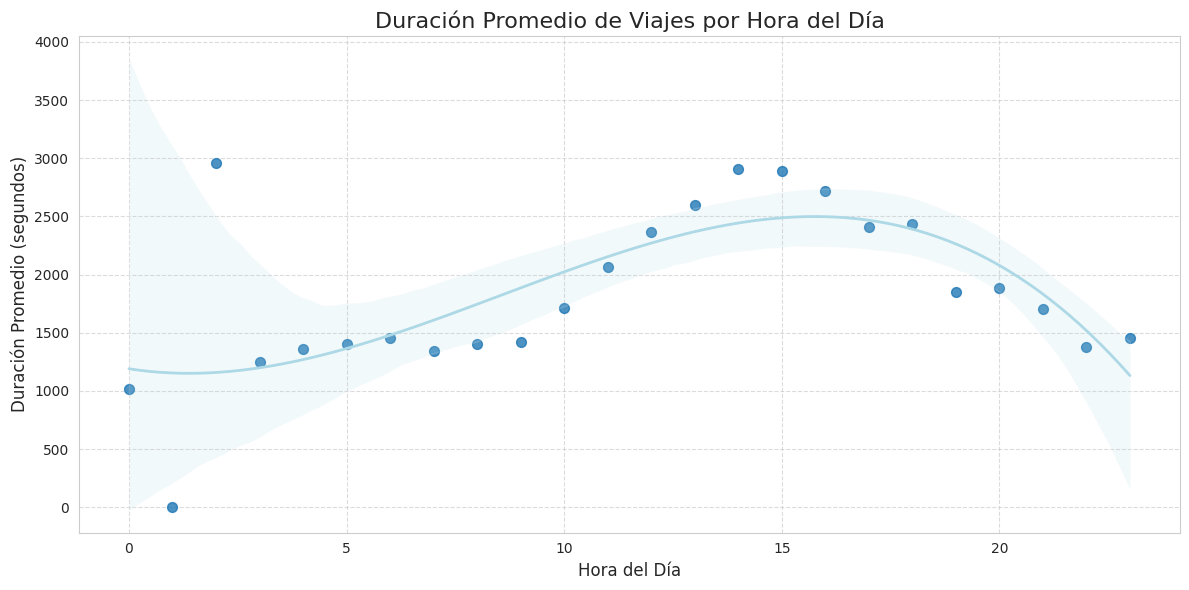

In [73]:
plt.figure(figsize=(12, 6))

sns.regplot(
    x='hour_of_day',
    y='duration_seconds',
    data=average_duration_by_hour,
    scatter=True,
    order=3,
    scatter_kws={'s': 50},
    line_kws={'color':'lightblue', 'linewidth': 2}
)

plt.title('Duración Promedio de Viajes por Hora del Día', fontsize=16)
plt.xlabel('Hora del Día', fontsize=12)
plt.ylabel('Duración Promedio (segundos)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



La duración media de los viajes por hora del día revela patrones distintos:
* **Temprano por la mañana (1-5 a. m.):** hay una variabilidad significativa, con algunas horas que muestran duraciones promedio excepcionalmente largas (por ejemplo, 2 a. m. con 2956 segundos, 4 a. m. con 1362 segundos) y otras horas (como la 1 a. m.) que muestran duraciones muy cortas (0 segundos), lo que podría indicar anomalías en los datos o patrones operativos específicos durante estas horas de poco tráfico.
* **Desplazamientos matutinos (6-9 a. m.):** La duración de los viajes suele aumentar, lo que probablemente refleja el inicio del tráfico en hora pico.
* **Durante el día (10 a. m. - 3 p. m.):** La duración parece estabilizarse o disminuir ligeramente en comparación con las horas pico.
* **Desplazamientos vespertinos (4-7 p. m.):** se observa otro aumento notable en la duración media de los viajes, lo que indica la hora pico vespertina.
* **Tarde/noche (8 p. m. - medianoche):** las duraciones tienden a disminuir a medida que el tráfico disminuye, volviendo a niveles más bajos.

### Principales conclusiones del análisis de datos
* Se ha creado con éxito una nueva columna, `hour_of_day`, en el DataFrame `df_trips_loop_ohare`, extrayendo la hora de la columna `start_ts`. Por ejemplo, un `start_ts` de `2017-11-25 16:00:00` dio como resultado un `hour_of_day` de `16`.
* Se calculó la duración media de los viajes por hora. Por ejemplo, la duración media para `hour_of_day` 0 (medianoche) fue de 1020,0 segundos, mientras que para `hour_of_day` 2 (2 a. m.) fue de 2956,0 segundos.
* Se generó un gráfico de líneas que representaba visualmente la «Duración promedio de los viajes por hora del día», mostrando claramente las fluctuaciones a lo largo del ciclo de 24 horas.
* El gráfico resaltó los picos en la duración promedio de los viajes durante lo que parecen ser las horas pico habituales (horas pico de la mañana y la tarde), y también indicó duraciones inusualmente largas en ciertas horas de la madrugada, posiblemente debido a un menor número de viajes y a tipos de servicio específicos.
